____
__Universite de Technologie de Troyes__<br/>
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Master OSS__<br/>
__Machine Learning & Pattern Recognition__<br/>
__Practice Sessions__<br/>
__Teacher: Martin Palazzo__<br/>
__Topic: Final Assessment__
____

In [1]:
# basics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

#sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load dataset

In [2]:
# about the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
data = datasets.fetch_california_housing()

In [3]:
# get feature matrix and label vector

# get feature matrix
x = data.data

# get label vector
y = data.target

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


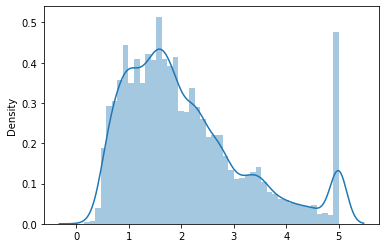

In [4]:
# visualize the label vector 
sns.distplot(y)
plt.show()

In [5]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
# get the shape of the X matrix
x.shape

(20640, 8)

# **Objectives for the assignment**
- make train-test-split (use 500 random samples for train and the rest for test)
- within train set make dimension reduction with PCA and kPCA from D = x.shape[1] features to P = [2,4,6]. In total you should make six dimension reductions, three for each method.
- Visualize the obtained reduced subspace in 2 dimensions and colour the samples with the labels, one visualization for PCA and one for kPCA.
- within train set perform regression with a linear regression and ridge regression (check scikit learn toolkit). Select the best hyperparameters of the models by using cross-validation (check GridSearchCV in scikit learn)
- Transform the test set with the dimension reduction learned in the first step. Then apply the learned regression function of the previous step and make regression on test set. Determine which model is the best based on evaluation metrics.
- compare the regression performance in latent space against the same regression in the original input space to measure if the latent space improves the regression task.


# **Conditions**
- the assignment is individual and personal. Each student must do it by their own.
- The methodology and results obtained must be written in a 2-3 pages technical report. 
#### **The report must include** 
- at least 3 cited papers.
- the following sections: Title, Abstract, Introduccion, Methods, Experiments, Discussion and Conclusions
- You are free to implement more methods like neural networks

In [7]:
#make train-test-split (use 500 random samples for train and the rest for test)
x, x_te, y, y_te = train_test_split(x, y, test_size=(x.shape[0]-500)/x.shape[0], random_state=0)

In [8]:
x.shape

(500, 8)

In [9]:
x_te.shape

(20140, 8)

Text(0.5, 1.0, 'X matrix')

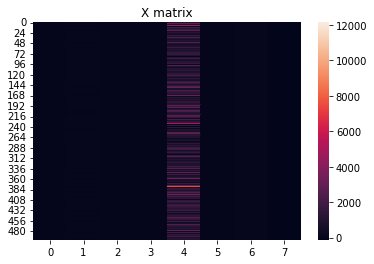

In [10]:
sns.heatmap(x)
plt.title('X matrix')

# Min Max Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scal = scaler.fit_transform(x)
x_te_scal = scaler.transform(x_te)


Text(0.5, 1.0, 'X matrix')

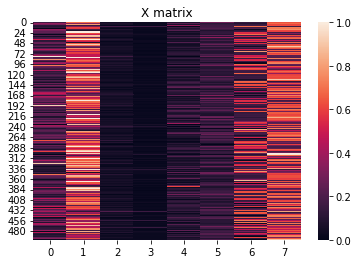

In [12]:
sns.heatmap(x_scal)
plt.title('X matrix')

## PCA

In [13]:
# create co-variance matrix 
cov = np.cov(np.transpose(x_scal))


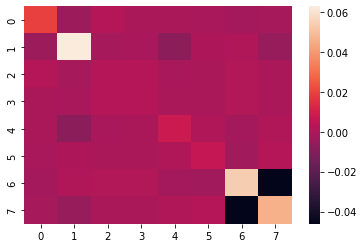

In [14]:
# visualize covariance matrix
sns.heatmap(cov)
plt.plot('Covariance Matrix')

In [15]:
# perform eigen-decomposition on the covariance matrix
from numpy import linalg as LA
eig_vals , eig_vecs = LA.eig(cov)

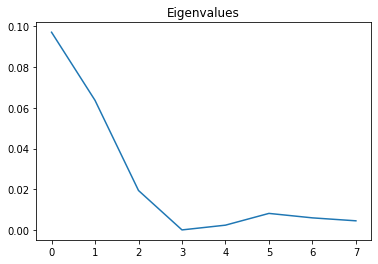

In [16]:
#plot the eigenvalues
plt.plot(eig_vals)
plt.title('Eigenvalues')
plt.show()

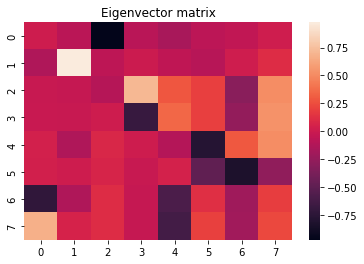

In [17]:
#visualize the eigen-vectors matrix
sns.heatmap(eig_vecs.real)
plt.title('Eigenvector matrix')
plt.show()

In [18]:
eig_vecs.real.shape


(8, 8)

PCA with P = 2

In [19]:
# define the latent dimensions 
latent_dim = 2

In [20]:

# obtain the beta matrix, the one used to project the input data into the latent space such as z = np.dot(x, beta)
# the number of eigenvectors retained is equal to the size of the latent dimension
beta_pca_2 = eig_vecs.real[:,:latent_dim]

In [21]:
beta_pca_2.shape


(8, 2)

In [22]:
# project the input data x into the latent space z via the beta matrix
z_pca_2 = np.dot(x_scal,beta_pca_2)

In [23]:
z_pca_2.shape

(500, 2)

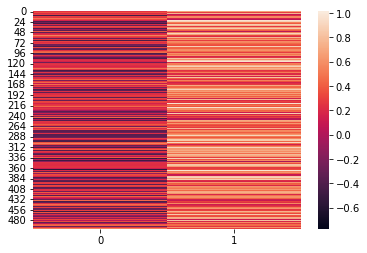

In [24]:
# visualize the latent space z matrix
sns.heatmap(z_pca_2)

PCA with P = 4

In [25]:
# define the latent dimensions 
latent_dim = 4

In [26]:

# obtain the beta matrix, the one used to project the input data into the latent space such as z = np.dot(x, beta)
# the number of eigenvectors retained is equal to the size of the latent dimension
beta_pca_4 = eig_vecs.real[:,:latent_dim]

In [27]:
beta_pca_4.shape


(8, 4)

In [28]:
# project the input data x into the latent space z via the beta matrix
z_pca_4 = np.dot(x_scal,beta_pca_4)

In [29]:
z_pca_4.shape

(500, 4)

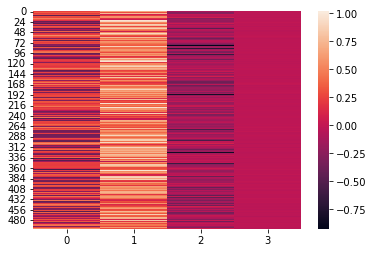

In [30]:
# visualize the latent space z matrix
sns.heatmap(z_pca_4)

PCA with P = 6

In [31]:
# define the latent dimensions 
latent_dim = 6

In [32]:

# obtain the beta matrix, the one used to project the input data into the latent space such as z = np.dot(x, beta)
# the number of eigenvectors retained is equal to the size of the latent dimension
beta_pca_6 = eig_vecs.real[:,:latent_dim]

In [33]:
beta_pca_6.shape


(8, 6)

In [34]:
# project the input data x into the latent space z via the beta matrix
z_pca_6 = np.dot(x_scal,beta_pca_6)

In [35]:
z_pca_6.shape

(500, 6)

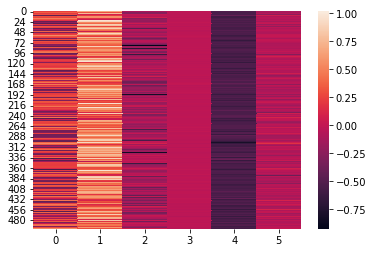

In [36]:
# visualize the latent space z matrix
sns.heatmap(z_pca_6)

## KPCA Gaussian

In [37]:
# Center kernel matrix

def center_kernel(K):
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
  return K

In [38]:
# define gaussian kernel
def gaussian_kernel(X, Y, sigma):
    """
    computes Gram matrix K using a Gaussian kernel
    K_ij = exp(-||X[:,i]-Y[:,j]||^2/(2*sigma^2))
    
    arguments:
    X     --  nxd array
    Y     --  nxd array
    sigma --  kernel width
    
    returns:
    K     --  nxn Gram matrix     
    """
    
    if X.shape[1] != Y.shape[1] :
        raise(ValueError('X and Y must have the same dimensions'))
    
    nx, d = X.shape
    ny    = Y.shape[0]
    
    G = (X**2).sum(axis=1) 
    H = (Y**2).sum(axis=1)
    
    Q = np.tile(G[:,np.newaxis],(1,ny))
    R = np.tile(H, (nx,1))
    
    K = Q + R -2*np.dot(X, Y.T)
    
    K = np.exp(-K/(2*sigma**2))
    
    return K

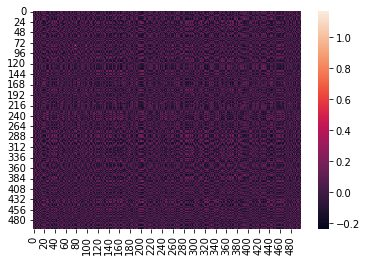

In [39]:
# create gaussian kernel matrix
sigma = 1
kernel_gau = center_kernel(gaussian_kernel(x_scal,x_scal, sigma))
sns.heatmap(kernel_gau)

In [40]:
# eigen decomposition of the kernel matrix
eig_vals_kpca_gau , eig_vecs_kpca_gau = LA.eig(kernel_gau)

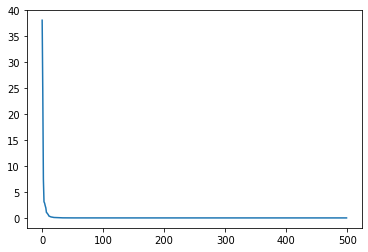

In [41]:
# plot eigen values
plt.plot(eig_vals_kpca_gau)

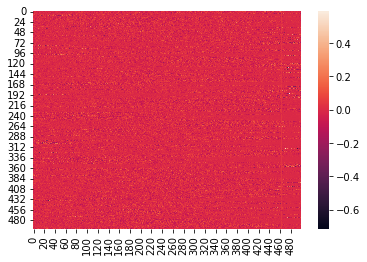

In [42]:
# plot eigen vectors matrix
sns.heatmap(eig_vecs_kpca_gau.real)

KPCA P=2

In [43]:
latent_dim = 2

In [44]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_gau_2 = eig_vecs_kpca_gau.real[:,:latent_dim]

In [45]:
# project the samples in the latent space
z_kpca_gau_2 = np.dot(kernel_gau.real,beta_kpca_gau_2)

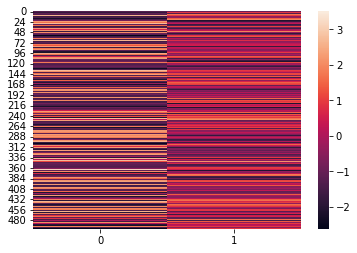

In [46]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_gau_2)

KPCA P=4

In [47]:
latent_dim = 4

In [48]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_gau_4 = eig_vecs_kpca_gau.real[:,:latent_dim]

In [49]:
# project the samples in the latent space
z_kpca_gau_4 = np.dot(kernel_gau.real,beta_kpca_gau_4)

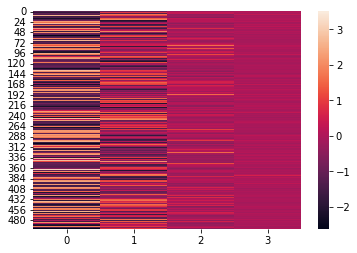

In [50]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_gau_4)

KPCA P=6

In [51]:
latent_dim = 6

In [52]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_gau_6 = eig_vecs_kpca_gau.real[:,:latent_dim]

In [53]:
# project the samples in the latent space
z_kpca_gau_6 = np.dot(kernel_gau.real,beta_kpca_gau_6)

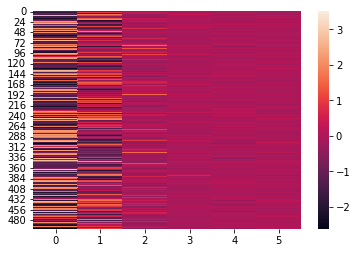

In [54]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_gau_6)

##KPCA Linear

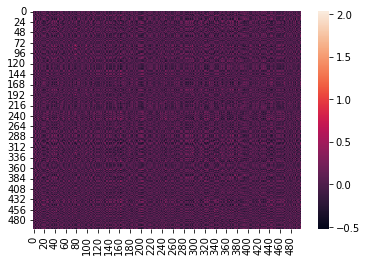

In [55]:
# Create a Linear Kernel 
kernel_lin = center_kernel(np.dot(x_scal, np.transpose(x_scal)))
sns.heatmap(kernel_lin)

In [56]:
# eigen decomposition of the kernel matrix
eig_vals_kpca_lin , eig_vecs_kpca_lin = LA.eig(kernel_lin)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


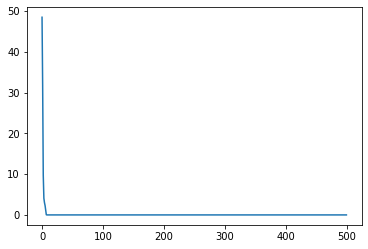

In [57]:
# plot eigen values
plt.plot(eig_vals_kpca_lin)

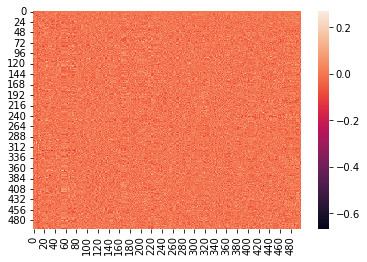

In [58]:
# plot eigen vectors matrix
sns.heatmap(eig_vecs_kpca_lin.real)

KPCA P=2

In [59]:
latent_dim = 2

In [60]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_lin_2 = eig_vecs_kpca_lin.real[:,:latent_dim]

In [61]:
# project the samples in the latent space
z_kpca_lin_2 = np.dot(kernel_lin.real,beta_kpca_lin_2)

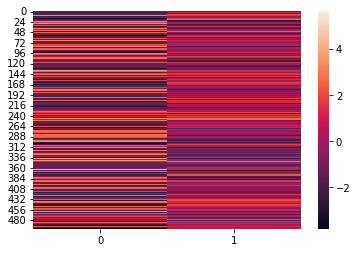

In [62]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_lin_2)

KPCA P=4

In [63]:
latent_dim = 4

In [64]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_lin_4 = eig_vecs_kpca_lin.real[:,:latent_dim]

In [65]:
# project the samples in the latent space
z_kpca_lin_4 = np.dot(kernel_lin.real,beta_kpca_lin_4)

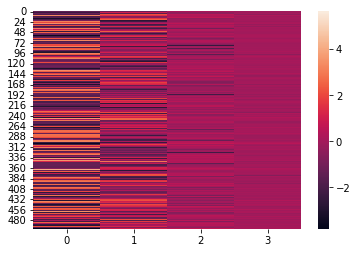

In [66]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_lin_4)

KPCA P=6

In [67]:
latent_dim = 6

In [68]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_lin_6 = eig_vecs_kpca_lin.real[:,:latent_dim]

In [69]:
# project the samples in the latent space
z_kpca_lin_6 = np.dot(kernel_lin.real,beta_kpca_lin_6)

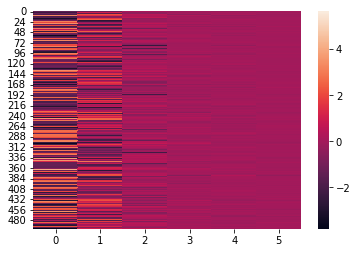

In [70]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_lin_6)

## Visualization

In [71]:
# visualization of the obtained latent space
def visualize_latent_pca(x, y):
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 2)
  zpca = pca.fit_transform(x)
  plt.scatter(zpca[:,0], zpca[:,0], c=y, alpha = 0.5, s = 30)
  plt.show()


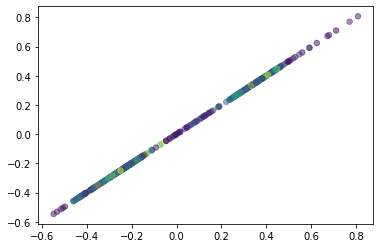

In [72]:
# visualize the latent space obtained with PCA of 2 components
visualize_latent_pca(z_pca_2,y.ravel())

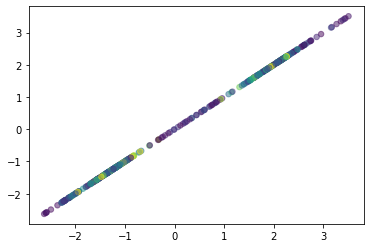

In [73]:
# visualize the kpca latent space
visualize_latent_pca(z_kpca_gau_2, y.ravel())

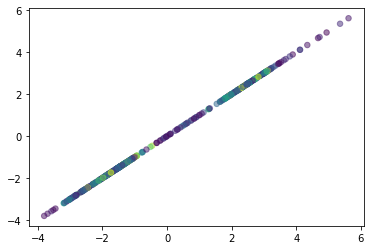

In [74]:
# visualize the kpca latent space
visualize_latent_pca(z_kpca_lin_2, y.ravel())

## Regression with Z KPCA Linear

### Linear

Latent dim = 2

In [75]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_kpca_lin_2,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [76]:
from sklearn.linear_model import LinearRegression
# Train model
lr_kpca_lin_2 = LinearRegression().fit(z_kpca_lin_2, y)
# get cross val scores
get_cv_scores(lr_kpca_lin_2)

R²:  -0.00883819225156468
Standard Deviation:  0.016999829200046328




Latent dim = 4

In [77]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_kpca_lin_4,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [78]:
from sklearn.linear_model import LinearRegression
# Train model
lr_kpca_lin_4 = LinearRegression().fit(z_kpca_lin_4, y)
# get cross val scores
get_cv_scores(lr_kpca_lin_4)

R²:  0.5663824836317536
Standard Deviation:  0.1034421362511527




Latent dim = 6

In [79]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_kpca_lin_6,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [80]:
from sklearn.linear_model import LinearRegression
# Train model
lr_kpca_lin_6 = LinearRegression().fit(z_kpca_lin_6, y)
# get cross val scores
get_cv_scores(lr_kpca_lin_6)

R²:  0.5781526258790646
Standard Deviation:  0.09069950985940647




### Ridge

In [81]:
from sklearn.linear_model import Ridge


Latent dim = 2

In [82]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_kpca_lin_2, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_kpca_2=best_model.fit(z_kpca_lin_2,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.006550541582146496
Best Params:  {'alpha': 1000}


Latent dim = 4

In [83]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_kpca_lin_4, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_kpca_4=best_model.fit(z_kpca_lin_4,y)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.5665376437505341
Best Params:  {'alpha': 1}


Latent dim = 6

In [84]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_kpca_lin_6, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_kpca_6=best_model.fit(z_kpca_lin_6,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.5905238725842648
Best Params:  {'alpha': 1}


## Regression with Z PCA

### Linear

Latent dim = 2

In [85]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_pca_2,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [86]:
from sklearn.linear_model import LinearRegression
# Train model
lr_2 = LinearRegression().fit(z_pca_2, y)
# get cross val scores
get_cv_scores(lr_2)

R²:  -0.00883819225156468
Standard Deviation:  0.01699982920004639




Latent dim = 4

In [87]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_pca_4,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [88]:
from sklearn.linear_model import LinearRegression
# Train model
lr_4 = LinearRegression().fit(z_pca_4, y)
# get cross val scores
get_cv_scores(lr_2)

R²:  0.580580509119466
Standard Deviation:  0.1001957121590439




Latent dim = 6

In [89]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_pca_6,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [90]:
from sklearn.linear_model import LinearRegression
# Train model
lr_6 = LinearRegression().fit(z_pca_6, y)
# get cross val scores
get_cv_scores(lr_6)

R²:  0.6190285187560385
Standard Deviation:  0.08898895372187922




### Ridge

Latent dim = 2

In [91]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_pca_2, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_pca_2=best_model.fit(z_pca_2,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.005926023894947341
Best Params:  {'alpha': 100}


Latent dim = 4

In [92]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_pca_4, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_pca_4=best_model.fit(z_pca_4,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.5814749138859573
Best Params:  {'alpha': 0.01}


Latent dim = 6

In [93]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_pca_6, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_pca_6=best_model.fit(z_pca_6,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6202380090566586
Best Params:  {'alpha': 0.01}


## Test PCA

In [94]:
# project the input data x into the latent space z via the beta matrix
z_te_pca_2 = np.dot(x_te_scal,beta_pca_2)

In [95]:
# project the input data x into the latent space z via the beta matrix
z_te_pca_4 = np.dot(x_te_scal,beta_pca_4)

In [96]:
# project the input data x into the latent space z via the beta matrix
z_te_pca_6 = np.dot(x_te_scal,beta_pca_6)

###Ridge

2

In [97]:
y_pred = ridge_pca_2.predict(z_te_pca_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.099965
1      2.41300   2.106729
2      2.00700   2.075423
3      0.72500   2.125048
4      4.60000   2.071267
...        ...        ...
20135  5.00001   2.084232
20136  0.74700   2.055788
20137  1.44000   2.056026
20138  3.39200   2.082676
20139  2.25000   2.097165

[20140 rows x 2 columns]


In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.91
Mean squared error: 1.33
Root mean squared error: 1.15


4

In [99]:
y_pred = ridge_pca_4.predict(z_te_pca_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.085343
1      2.41300   2.863098
2      2.00700   2.091205
3      0.72500   1.773160
4      4.60000   2.780169
...        ...        ...
20135  5.00001   5.172479
20136  0.74700   1.304156
20137  1.44000   1.101432
20138  3.39200   2.872772
20139  2.25000   1.172232

[20140 rows x 2 columns]


In [100]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.57
Mean squared error: 0.62
Root mean squared error: 0.79


6

In [101]:
y_pred = ridge_pca_6.predict(z_te_pca_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.285868
1      2.41300   2.753713
2      2.00700   1.849014
3      0.72500   1.326399
4      4.60000   2.927160
...        ...        ...
20135  5.00001   5.073671
20136  0.74700   1.138130
20137  1.44000   0.850937
20138  3.39200   2.845605
20139  2.25000   1.363057

[20140 rows x 2 columns]


In [102]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.55
Mean squared error: 0.67
Root mean squared error: 0.82


###Linear

2

In [103]:
y_pred = lr_2.predict(z_te_pca_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.107399
1      2.41300   2.142150
2      2.00700   2.033695
3      0.72500   2.211322
4      4.60000   2.015424
...        ...        ...
20135  5.00001   2.070623
20136  0.74700   1.940794
20137  1.44000   1.930711
20138  3.39200   2.064427
20139  2.25000   2.103075

[20140 rows x 2 columns]


In [104]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.91
Mean squared error: 1.32
Root mean squared error: 1.15


4

In [105]:
y_pred = lr_4.predict(z_te_pca_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.076557
1      2.41300   2.838541
2      2.00700   2.077749
3      0.72500   1.821813
4      4.60000   2.829823
...        ...        ...
20135  5.00001   5.179502
20136  0.74700   1.307209
20137  1.44000   1.045975
20138  3.39200   2.853101
20139  2.25000   1.223609

[20140 rows x 2 columns]


In [106]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.57
Mean squared error: 0.63
Root mean squared error: 0.79


6

In [107]:
y_pred = lr_6.predict(z_te_pca_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.278655
1      2.41300   2.728249
2      2.00700   1.833525
3      0.72500   1.371601
4      4.60000   2.978168
...        ...        ...
20135  5.00001   5.079856
20136  0.74700   1.139962
20137  1.44000   0.792390
20138  3.39200   2.825733
20139  2.25000   1.416113

[20140 rows x 2 columns]


In [108]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.55
Mean squared error: 0.72
Root mean squared error: 0.85


## Test KPCA Linear

In [109]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'linear')
z_kpca_lin_2 = kpca.fit_transform(x_scal)
z_te_kpca_lin_2 = kpca.transform(x_te_scal)

In [110]:
kpca = KernelPCA(n_components = 4, kernel = 'linear')
z_kpca_lin_4 = kpca.fit_transform(x_scal)
z_te_kpca_lin_4 = kpca.transform(x_te_scal)

In [111]:
kpca = KernelPCA(n_components = 6, kernel = 'linear')
z_kpca_lin_6 = kpca.fit_transform(x_scal)
z_te_kpca_lin_6 = kpca.transform(x_te_scal)

###Ridge

2

In [112]:
y_pred = ridge_kpca_2.predict(z_te_kpca_lin_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.094766
1      2.41300   2.097643
2      2.00700   2.087275
3      0.72500   2.104032
4      4.60000   2.085680
...        ...        ...
20135  5.00001   2.090553
20136  0.74700   2.079371
20137  1.44000   2.078836
20138  3.39200   2.089992
20139  2.25000   2.094141

[20140 rows x 2 columns]


In [113]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.92
Mean squared error: 1.33
Root mean squared error: 1.15


4

In [114]:
y_pred = ridge_kpca_4.predict(z_te_kpca_lin_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.081843
1      2.41300   1.834804
2      2.00700   2.043383
3      0.72500   2.342220
4      4.60000   1.919101
...        ...        ...
20135  5.00001   1.107634
20136  0.74700   2.286197
20137  1.44000   2.166314
20138  3.39200   1.804466
20139  2.25000   2.473991

[20140 rows x 2 columns]


In [115]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.08
Mean squared error: 1.86
Root mean squared error: 1.36


6

In [116]:
y_pred = ridge_kpca_6.predict(z_te_kpca_lin_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.246447
1      2.41300   1.845223
2      2.00700   2.051122
3      0.72500   2.362867
4      4.60000   1.828438
...        ...        ...
20135  5.00001   1.146031
20136  0.74700   2.314826
20137  1.44000   1.505308
20138  3.39200   1.855607
20139  2.25000   2.424144

[20140 rows x 2 columns]


In [117]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.13
Mean squared error: 4.27
Root mean squared error: 2.07


###Linear

2

In [118]:
y_pred = lr_kpca_lin_2.predict(z_te_kpca_lin_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.094182
1      2.41300   2.100986
2      2.00700   2.083785
3      0.72500   2.112608
4      4.60000   2.080445
...        ...        ...
20135  5.00001   2.090374
20136  0.74700   2.066210
20137  1.44000   2.063365
20138  3.39200   2.089300
20139  2.25000   2.094110

[20140 rows x 2 columns]


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.92
Mean squared error: 1.33
Root mean squared error: 1.15


4

In [120]:
y_pred = lr_kpca_lin_4.predict(z_te_kpca_lin_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.081381
1      2.41300   1.831966
2      2.00700   2.042820
3      0.72500   2.345628
4      4.60000   1.917927
...        ...        ...
20135  5.00001   1.097102
20136  0.74700   2.289100
20137  1.44000   2.163348
20138  3.39200   1.801531
20139  2.25000   2.478430

[20140 rows x 2 columns]


In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.08
Mean squared error: 1.87
Root mean squared error: 1.37


6

In [122]:
y_pred = lr_kpca_lin_6.predict(z_te_kpca_lin_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.267776
1      2.41300   1.843435
2      2.00700   2.050345
3      0.72500   2.366115
4      4.60000   1.821116
...        ...        ...
20135  5.00001   1.140409
20136  0.74700   2.324639
20137  1.44000   1.399867
20138  3.39200   1.858380
20139  2.25000   2.425656

[20140 rows x 2 columns]


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.14
Mean squared error: 4.88
Root mean squared error: 2.21


##Test Original Space

###Linear

In [124]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_scal,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [125]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(x_scal, y)
# get cross val scores
get_cv_scores(lr)

R²:  0.6644794583708186
Standard Deviation:  0.07733078076594292




In [126]:
y_pred = lr.predict(x_te_scal)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   1.967221
1      2.41300   2.708036
2      2.00700   1.817005
3      0.72500   1.328148
4      4.60000   3.158587
...        ...        ...
20135  5.00001   5.006945
20136  0.74700   1.090528
20137  1.44000   2.020321
20138  3.39200   2.727363
20139  2.25000   1.515996

[20140 rows x 2 columns]


In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.54
Mean squared error: 6.57
Root mean squared error: 2.56


###Ridge

In [128]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_scal, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge=best_model.fit(x_scal,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6658516644481485
Best Params:  {'alpha': 0.01}


In [129]:
y_pred = ridge.predict(x_te_scal)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   1.975550
1      2.41300   2.733565
2      2.00700   1.832524
3      0.72500   1.283034
4      4.60000   3.107071
...        ...        ...
20135  5.00001   5.001017
20136  0.74700   1.088947
20137  1.44000   2.074117
20138  3.39200   2.747563
20139  2.25000   1.462670

[20140 rows x 2 columns]


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.54
Mean squared error: 6.81
Root mean squared error: 2.61


#Standard Scaler

In [131]:
from sklearn.preprocessing import StandardScaler
x_scal = StandardScaler().fit_transform(x)
x_te_scal = StandardScaler().fit_transform(x_te) 

Text(0.5, 1.0, 'X matrix')

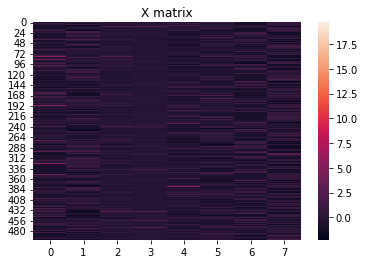

In [132]:
sns.heatmap(x_scal)
plt.title('X matrix')

## PCA

In [133]:
# create co-variance matrix 
cov = np.cov(np.transpose(x_scal))


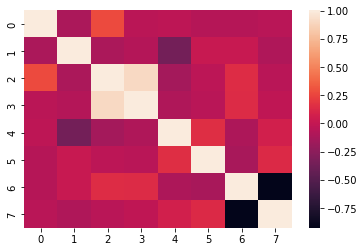

In [134]:
# visualize covariance matrix
sns.heatmap(cov)
plt.plot('Covariance Matrix')

In [135]:
# perform eigen-decomposition on the covariance matrix
from numpy import linalg as LA
eig_vals , eig_vecs = LA.eig(cov)

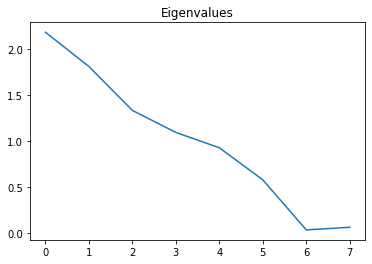

In [136]:
#plot the eigenvalues
plt.plot(eig_vals)
plt.title('Eigenvalues')
plt.show()

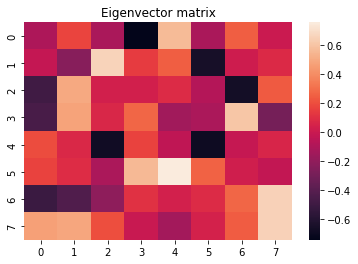

In [137]:
#visualize the eigen-vectors matrix
sns.heatmap(eig_vecs.real)
plt.title('Eigenvector matrix')
plt.show()

In [138]:
eig_vecs.real.shape


(8, 8)

PCA with P = 2

In [139]:
# define the latent dimensions 
latent_dim = 2

In [140]:

# obtain the beta matrix, the one used to project the input data into the latent space such as z = np.dot(x, beta)
# the number of eigenvectors retained is equal to the size of the latent dimension
beta_pca_2 = eig_vecs.real[:,:latent_dim]

In [141]:
beta_pca_2.shape


(8, 2)

In [142]:
# project the input data x into the latent space z via the beta matrix
z_pca_2 = np.dot(x_scal,beta_pca_2)

In [143]:
z_pca_2.shape

(500, 2)

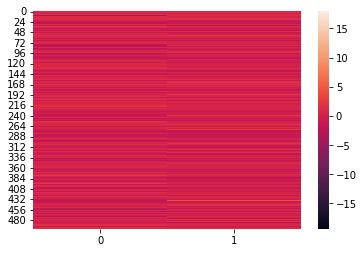

In [144]:
# visualize the latent space z matrix
sns.heatmap(z_pca_2)

PCA with P = 4

In [145]:
# define the latent dimensions 
latent_dim = 4

In [146]:

# obtain the beta matrix, the one used to project the input data into the latent space such as z = np.dot(x, beta)
# the number of eigenvectors retained is equal to the size of the latent dimension
beta_pca_4 = eig_vecs.real[:,:latent_dim]

In [147]:
beta_pca_4.shape


(8, 4)

In [148]:
# project the input data x into the latent space z via the beta matrix
z_pca_4 = np.dot(x_scal,beta_pca_4)

In [149]:
z_pca_4.shape

(500, 4)

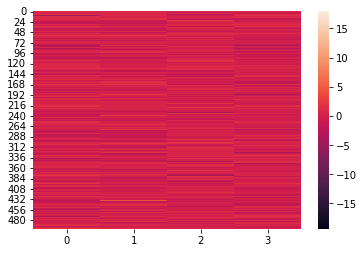

In [150]:
# visualize the latent space z matrix
sns.heatmap(z_pca_4)

PCA with P = 6

In [151]:
# define the latent dimensions 
latent_dim = 6

In [152]:

# obtain the beta matrix, the one used to project the input data into the latent space such as z = np.dot(x, beta)
# the number of eigenvectors retained is equal to the size of the latent dimension
beta_pca_6 = eig_vecs.real[:,:latent_dim]

In [153]:
beta_pca_6.shape


(8, 6)

In [154]:
# project the input data x into the latent space z via the beta matrix
z_pca_6 = np.dot(x_scal,beta_pca_6)

In [155]:
z_pca_6.shape

(500, 6)

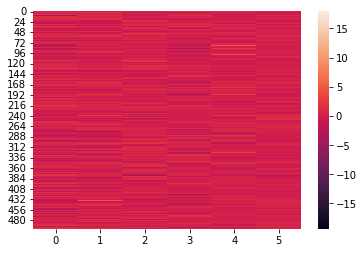

In [156]:
# visualize the latent space z matrix
sns.heatmap(z_pca_6)

## KPCA Gaussian

In [157]:
# Center kernel matrix

def center_kernel(K):
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
  return K

In [158]:
# define gaussian kernel
def gaussian_kernel(X, Y, sigma):
    """
    computes Gram matrix K using a Gaussian kernel
    K_ij = exp(-||X[:,i]-Y[:,j]||^2/(2*sigma^2))
    
    arguments:
    X     --  nxd array
    Y     --  nxd array
    sigma --  kernel width
    
    returns:
    K     --  nxn Gram matrix     
    """
    
    if X.shape[1] != Y.shape[1] :
        raise(ValueError('X and Y must have the same dimensions'))
    
    nx, d = X.shape
    ny    = Y.shape[0]
    
    G = (X**2).sum(axis=1) 
    H = (Y**2).sum(axis=1)
    
    Q = np.tile(G[:,np.newaxis],(1,ny))
    R = np.tile(H, (nx,1))
    
    K = Q + R -2*np.dot(X, Y.T)
    
    K = np.exp(-K/(2*sigma**2))
    
    return K

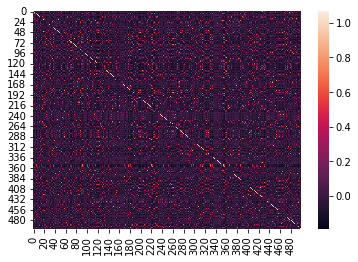

In [159]:
# create gaussian kernel matrix
sigma = 1
kernel_gau = center_kernel(gaussian_kernel(x_scal,x_scal, sigma))
sns.heatmap(kernel_gau)

In [160]:
# eigen decomposition of the kernel matrix
eig_vals_kpca_gau , eig_vecs_kpca_gau = LA.eig(kernel_gau)

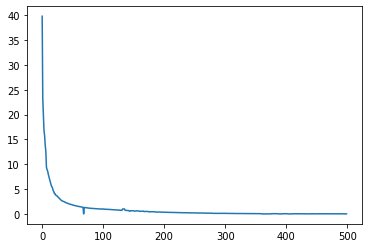

In [161]:
# plot eigen values
plt.plot(eig_vals_kpca_gau)

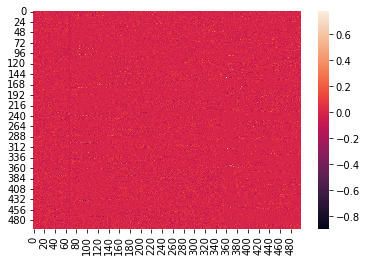

In [162]:
# plot eigen vectors matrix
sns.heatmap(eig_vecs_kpca_gau.real)

KPCA P=2

In [163]:
latent_dim = 2

In [164]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_gau_2 = eig_vecs_kpca_gau.real[:,:latent_dim]

In [165]:
# project the samples in the latent space
z_kpca_gau_2 = np.dot(kernel_gau.real,beta_kpca_gau_2)

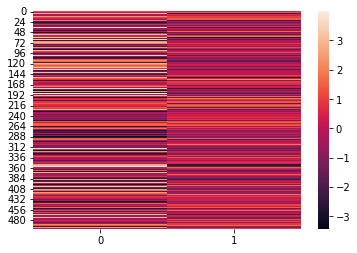

In [166]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_gau_2)

KPCA P=4

In [167]:
latent_dim = 4

In [168]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_gau_4 = eig_vecs_kpca_gau.real[:,:latent_dim]

In [169]:
# project the samples in the latent space
z_kpca_gau_4 = np.dot(kernel_gau.real,beta_kpca_gau_4)

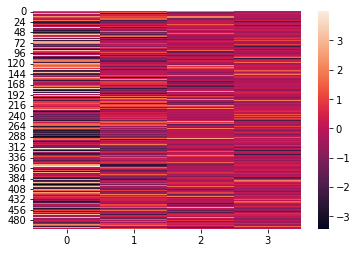

In [170]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_gau_4)

KPCA P=6

In [171]:
latent_dim = 6

In [172]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_gau_6 = eig_vecs_kpca_gau.real[:,:latent_dim]

In [173]:
# project the samples in the latent space
z_kpca_gau_6 = np.dot(kernel_gau.real,beta_kpca_gau_6)

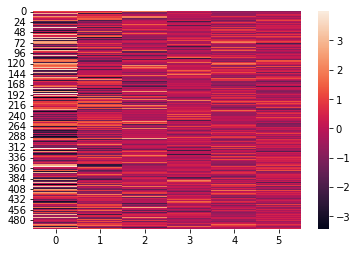

In [174]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_gau_6)

##KPCA Linear

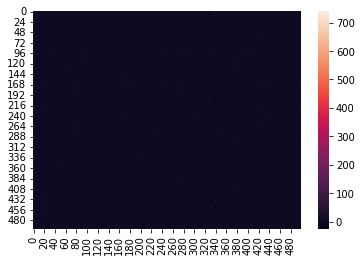

In [175]:
# Create a Linear Kernel 
kernel_lin = center_kernel(np.dot(x_scal, np.transpose(x_scal)))
sns.heatmap(kernel_lin)

In [176]:
# eigen decomposition of the kernel matrix
eig_vals_kpca_lin , eig_vecs_kpca_lin = LA.eig(kernel_lin)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


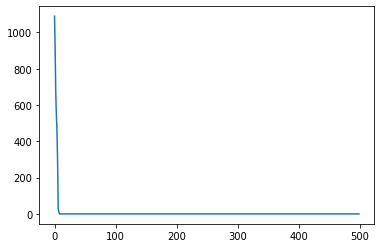

In [177]:
# plot eigen values
plt.plot(eig_vals_kpca_lin)

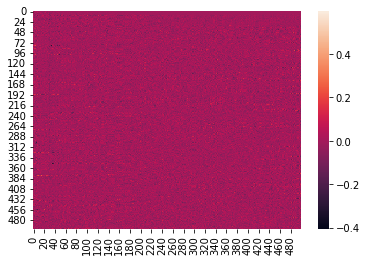

In [178]:
# plot eigen vectors matrix
sns.heatmap(eig_vecs_kpca_lin.real)

KPCA P=2

In [179]:
latent_dim = 2

In [180]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_lin_2 = eig_vecs_kpca_lin.real[:,:latent_dim]

In [181]:
# project the samples in the latent space
z_kpca_lin_2 = np.dot(kernel_lin.real,beta_kpca_lin_2)

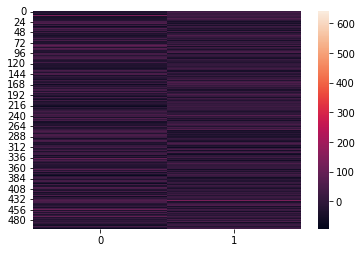

In [182]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_lin_2)

KPCA P=4

In [183]:
latent_dim = 4

In [184]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_lin_4 = eig_vecs_kpca_lin.real[:,:latent_dim]

In [185]:
# project the samples in the latent space
z_kpca_lin_4 = np.dot(kernel_lin.real,beta_kpca_lin_4)

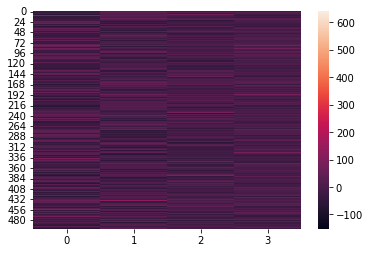

In [186]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_lin_4)

KPCA P=6

In [187]:
latent_dim = 6

In [188]:
# obtain the beta matrix for data projection into the latent space
beta_kpca_lin_6 = eig_vecs_kpca_lin.real[:,:latent_dim]

In [189]:
# project the samples in the latent space
z_kpca_lin_6 = np.dot(kernel_lin.real,beta_kpca_lin_6)

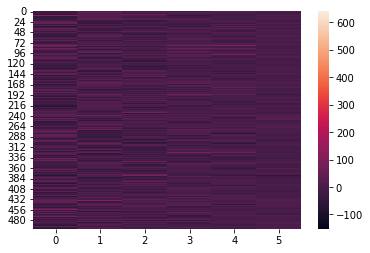

In [190]:
# visualize the latent space z matrix
sns.heatmap(z_kpca_lin_6)

## Visualization

In [191]:
# visualization of the obtained latent space
def visualize_latent_pca(x, y):
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 2)
  zpca = pca.fit_transform(x)
  plt.scatter(zpca[:,0], zpca[:,0], c=y, alpha = 0.5, s = 30)
  plt.show()


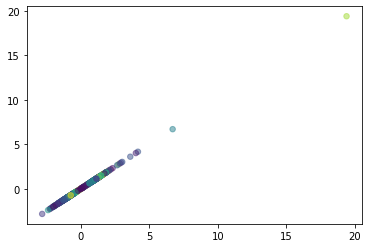

In [192]:
# visualize the latent space obtained with PCA of 2 components
visualize_latent_pca(z_pca_2,y.ravel())

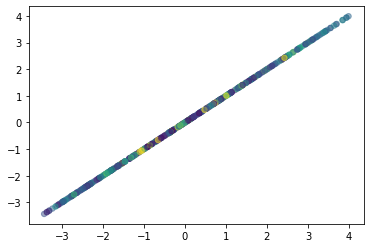

In [193]:
# visualize the kpca latent space
visualize_latent_pca(z_kpca_gau_2, y.ravel())

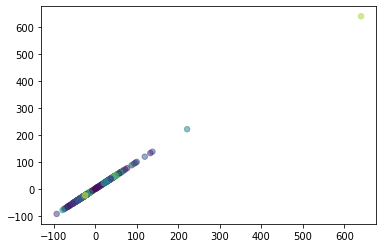

In [194]:
# visualize the kpca latent space
visualize_latent_pca(z_kpca_lin_2, y.ravel())

## Regression with Z KPCA Linear

### Linear

Latent dim = 2

In [195]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_kpca_lin_2,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [196]:
from sklearn.linear_model import LinearRegression
# Train model
lr_kpca_lin_2 = LinearRegression().fit(z_kpca_lin_2, y)
# get cross val scores
get_cv_scores(lr_kpca_lin_2)

R²:  -0.009392137613065898
Standard Deviation:  0.08581230488681416




Latent dim = 4

In [197]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_kpca_lin_4,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [198]:
from sklearn.linear_model import LinearRegression
# Train model
lr_kpca_lin_4 = LinearRegression().fit(z_kpca_lin_4, y)
# get cross val scores
get_cv_scores(lr_kpca_lin_4)

R²:  0.40032743200064475
Standard Deviation:  0.07631568307946389




Latent dim = 6

In [199]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_kpca_lin_6,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [200]:
from sklearn.linear_model import LinearRegression
# Train model
lr_kpca_lin_6 = LinearRegression().fit(z_kpca_lin_6, y)
# get cross val scores
get_cv_scores(lr_kpca_lin_6)

R²:  0.5755397728137773
Standard Deviation:  0.09542837457018513




### Ridge

In [201]:
from sklearn.linear_model import Ridge


Latent dim = 2

In [202]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_kpca_lin_2, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_kpca_2=best_model.fit(z_kpca_lin_2,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.008845908226684473
Best Params:  {'alpha': 1000}


Latent dim = 4

In [203]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_kpca_lin_4, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_kpca_4=best_model.fit(z_kpca_lin_4,y)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.40088741591590316
Best Params:  {'alpha': 1000}


Latent dim = 6

In [204]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_kpca_lin_6, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_kpca_6=best_model.fit(z_kpca_lin_6,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.5757151812985954
Best Params:  {'alpha': 1000}


## Regression with Z PCA

### Linear

Latent dim = 2

In [205]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_pca_2,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [206]:
from sklearn.linear_model import LinearRegression
# Train model
lr_2 = LinearRegression().fit(z_pca_2, y)
# get cross val scores
get_cv_scores(lr_2)

R²:  -0.009392137613065944
Standard Deviation:  0.08581230488681435




Latent dim = 4

In [207]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_pca_4,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [208]:
from sklearn.linear_model import LinearRegression
# Train model
lr_4 = LinearRegression().fit(z_pca_4, y)
# get cross val scores
get_cv_scores(lr_2)

R²:  0.4003274320006458
Standard Deviation:  0.07631568307946396




Latent dim = 6

In [209]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             z_pca_6,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [210]:
from sklearn.linear_model import LinearRegression
# Train model
lr_6 = LinearRegression().fit(z_pca_6, y)
# get cross val scores
get_cv_scores(lr_6)

R²:  0.5755397728137771
Standard Deviation:  0.09542837457018499




### Ridge

Latent dim = 2

In [211]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_pca_2, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_pca_2=best_model.fit(z_pca_2,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.022529789096326212
Best Params:  {'alpha': 1000}


Latent dim = 4

In [212]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_pca_4, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_pca_4=best_model.fit(z_pca_4,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.4027604541163366
Best Params:  {'alpha': 10}


Latent dim = 6

In [213]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(z_pca_6, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge_pca_6=best_model.fit(z_pca_6,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.5766732251866166
Best Params:  {'alpha': 10}


## Test PCA

In [214]:
# project the input data x into the latent space z via the beta matrix
z_te_pca_2 = np.dot(x_te_scal,beta_pca_2)

In [215]:
# project the input data x into the latent space z via the beta matrix
z_te_pca_4 = np.dot(x_te_scal,beta_pca_4)

In [216]:
# project the input data x into the latent space z via the beta matrix
z_te_pca_6 = np.dot(x_te_scal,beta_pca_6)

###Ridge

2

In [217]:
y_pred = ridge_pca_2.predict(z_te_pca_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.114749
1      2.41300   2.109395
2      2.00700   2.092330
3      0.72500   2.106105
4      4.60000   2.067627
...        ...        ...
20135  5.00001   2.204850
20136  0.74700   2.071904
20137  1.44000   2.106620
20138  3.39200   2.166673
20139  2.25000   2.026138

[20140 rows x 2 columns]


In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.91
Mean squared error: 1.31
Root mean squared error: 1.14


4

In [219]:
y_pred = ridge_pca_4.predict(z_te_pca_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.343268
1      2.41300   2.765409
2      2.00700   2.090536
3      0.72500   1.879422
4      4.60000   2.428001
...        ...        ...
20135  5.00001   4.048153
20136  0.74700   1.989710
20137  1.44000   1.253261
20138  3.39200   2.620614
20139  2.25000   1.422433

[20140 rows x 2 columns]


In [220]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.70
Mean squared error: 0.95
Root mean squared error: 0.97


6

In [221]:
y_pred = ridge_pca_6.predict(z_te_pca_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.187821
1      2.41300   3.058348
2      2.00700   2.246723
3      0.72500   1.562233
4      4.60000   2.288611
...        ...        ...
20135  5.00001   5.071853
20136  0.74700   1.163570
20137  1.44000   2.857947
20138  3.39200   2.975470
20139  2.25000   0.833507

[20140 rows x 2 columns]


In [222]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.61
Mean squared error: 0.71
Root mean squared error: 0.84


###Linear

2

In [223]:
y_pred = lr_2.predict(z_te_pca_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.153132
1      2.41300   2.134907
2      2.00700   2.077668
3      0.72500   2.134140
4      4.60000   2.027454
...        ...        ...
20135  5.00001   2.304275
20136  0.74700   2.048584
20137  1.44000   2.142861
20138  3.39200   2.226296
20139  2.25000   1.965024

[20140 rows x 2 columns]


In [224]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.90
Mean squared error: 1.31
Root mean squared error: 1.15


4

In [225]:
y_pred = lr_4.predict(z_te_pca_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.347687
1      2.41300   2.777525
2      2.00700   2.090405
3      0.72500   1.875263
4      4.60000   2.434417
...        ...        ...
20135  5.00001   4.082021
20136  0.74700   1.988269
20137  1.44000   1.238650
20138  3.39200   2.628903
20139  2.25000   1.411262

[20140 rows x 2 columns]


In [226]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.70
Mean squared error: 0.95
Root mean squared error: 0.98


6

In [227]:
y_pred = lr_6.predict(z_te_pca_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.187655
1      2.41300   3.078121
2      2.00700   2.250334
3      0.72500   1.549878
4      4.60000   2.288402
...        ...        ...
20135  5.00001   5.130109
20136  0.74700   1.136457
20137  1.44000   2.902802
20138  3.39200   2.991767
20139  2.25000   0.806693

[20140 rows x 2 columns]


In [228]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.61
Mean squared error: 0.71
Root mean squared error: 0.85


## Test KPCA Linear

In [229]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'linear')
z_kpca_lin_2 = kpca.fit_transform(x_scal)
z_te_kpca_lin_2 = kpca.transform(x_te_scal)

In [230]:
kpca = KernelPCA(n_components = 4, kernel = 'linear')
z_kpca_lin_4 = kpca.fit_transform(x_scal)
z_te_kpca_lin_4 = kpca.transform(x_te_scal)

In [231]:
kpca = KernelPCA(n_components = 6, kernel = 'linear')
z_kpca_lin_6 = kpca.fit_transform(x_scal)
z_te_kpca_lin_6 = kpca.transform(x_te_scal)

###Ridge

2

In [232]:
y_pred = ridge_kpca_2.predict(z_te_kpca_lin_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.095436
1      2.41300   2.094622
2      2.00700   2.092081
3      0.72500   2.094782
4      4.60000   2.090468
...        ...        ...
20135  5.00001   2.099297
20136  0.74700   2.091533
20137  1.44000   2.095301
20138  3.39200   2.096780
20139  2.25000   2.089143

[20140 rows x 2 columns]


In [233]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.92
Mean squared error: 1.33
Root mean squared error: 1.15


4

In [234]:
y_pred = ridge_kpca_4.predict(z_te_kpca_lin_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.087411
1      2.41300   2.068490
2      2.00700   2.089797
3      0.72500   2.111008
4      4.60000   2.072242
...        ...        ...
20135  5.00001   2.023268
20136  0.74700   2.090799
20137  1.44000   2.115406
20138  3.39200   2.079770
20139  2.25000   2.113846

[20140 rows x 2 columns]


In [235]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.93
Mean squared error: 1.37
Root mean squared error: 1.17


6

In [236]:
y_pred = ridge_kpca_6.predict(z_te_kpca_lin_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.090105
1      2.41300   2.071513
2      2.00700   2.094198
3      0.72500   2.106959
4      4.60000   2.095322
...        ...        ...
20135  5.00001   2.053290
20136  0.74700   2.115812
20137  1.44000   1.987864
20138  3.39200   2.093845
20139  2.25000   2.109837

[20140 rows x 2 columns]


In [237]:
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.93
Mean squared error: 1.36
Root mean squared error: 1.17


###Linear

2

In [238]:
y_pred = lr_kpca_lin_2.predict(z_te_kpca_lin_2)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.095441
1      2.41300   2.094625
2      2.00700   2.092078
3      0.72500   2.094785
4      4.60000   2.090463
...        ...        ...
20135  5.00001   2.099302
20136  0.74700   2.091532
20137  1.44000   2.095306
20138  3.39200   2.096782
20139  2.25000   2.089140

[20140 rows x 2 columns]


In [239]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.92
Mean squared error: 1.33
Root mean squared error: 1.15


4

In [240]:
y_pred = lr_kpca_lin_4.predict(z_te_kpca_lin_4)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.087388
1      2.41300   2.068404
2      2.00700   2.089787
3      0.72500   2.111063
4      4.60000   2.072176
...        ...        ...
20135  5.00001   2.023017
20136  0.74700   2.090797
20137  1.44000   2.115488
20138  3.39200   2.079714
20139  2.25000   2.113925

[20140 rows x 2 columns]


In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.93
Mean squared error: 1.37
Root mean squared error: 1.17


6

In [242]:
y_pred = lr_kpca_lin_6.predict(z_te_kpca_lin_6)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.090137
1      2.41300   2.071396
2      2.00700   2.094197
3      0.72500   2.107041
4      4.60000   2.095488
...        ...        ...
20135  5.00001   2.053104
20136  0.74700   2.116192
20137  1.44000   1.986509
20138  3.39200   2.093845
20139  2.25000   2.109996

[20140 rows x 2 columns]


In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.93
Mean squared error: 1.36
Root mean squared error: 1.17


##Test Original Space

###Linear

In [244]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_scal,
                             y,
                             cv=5,
                             scoring='r2')
    
    print('R²: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [245]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(x_scal, y)
# get cross val scores
get_cv_scores(lr)

R²:  0.6644794583708183
Standard Deviation:  0.07733078076594281




In [246]:
y_pred = lr.predict(x_te_scal)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.247121
1      2.41300   2.729564
2      2.00700   1.842594
3      0.72500   1.313305
4      4.60000   3.007626
...        ...        ...
20135  5.00001   4.963398
20136  0.74700   1.067468
20137  1.44000   1.978901
20138  3.39200   2.717524
20139  2.25000   1.533427

[20140 rows x 2 columns]


In [247]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.54
Mean squared error: 0.59
Root mean squared error: 0.77


###Ridge

In [248]:
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_scal, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
best_model = grid_result.best_estimator_
ridge=best_model.fit(x_scal,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6658395765101485
Best Params:  {'alpha': 1}


In [249]:
y_pred = ridge.predict(x_te_scal)
df_preds = pd.DataFrame({'Actual': y_te.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0      1.36900   2.247472
1      2.41300   2.741371
2      2.00700   1.856282
3      0.72500   1.315372
4      4.60000   2.979689
...        ...        ...
20135  5.00001   4.964234
20136  0.74700   1.071088
20137  1.44000   2.008137
20138  3.39200   2.728179
20139  2.25000   1.506934

[20140 rows x 2 columns]


In [250]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.54
Mean squared error: 0.59
Root mean squared error: 0.77
